In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

#This is a regression problem 

np.random.seed(42)


x_train = np.linspace(-100, 100, 1000).reshape(-1, 1)  
y_train = 2 * x_train**2 - 10 * x_train + 8 

x_test = np.linspace(-10, 10, 200).reshape(-1, 1)  
y_test = 2 * x_test**2 - 10 * x_test + 8

# 2. Define the Neural Network
model = Sequential([
    Dense(512, activation='relu', input_shape=(1,)),  # Hidden Layer 1
    Dense(1024, activation='relu'),                    # Hidden Layer 2
    Dense(2048, activation='relu'),                   # Hidden Layer 3
    Dense(1024, activation='relu'),                    # Hidden Layer 4
    Dense(512, activation='relu'),                    # Hidden Layer 5
    Dense(1, activation='linear')                  # Output Layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
# model.save("polynomial_regression_model.h5")


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6941.4214 - mae: 51.3753 - val_loss: 538.7289 - val_mae: 20.4526
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 501.1044 - mae: 18.5152 - val_loss: 404.2362 - val_mae: 15.7333
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 391.6729 - mae: 15.6570 - val_loss: 263.1624 - val_mae: 13.0189
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 250.7381 - mae: 12.6824 - val_loss: 271.0139 - val_mae: 13.2265
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 158.8549 - mae: 9.3741 - val_loss: 96.6022 - val_mae: 6.5317
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 83.8835 - mae: 5.9350 - val_loss: 78.0719 - val_mae: 6.0319
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 41.8378 - mae: 4.1085 - val_loss: 21.2015 - val_mae: 3.1927
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 25.7280 - mae: 3.1937 - val_loss: 59.5832 - val_mae: 4.8002
Epoch 9/100
32/32 ━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


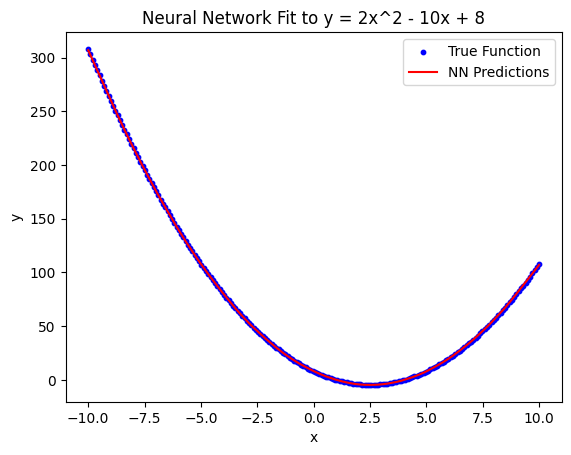

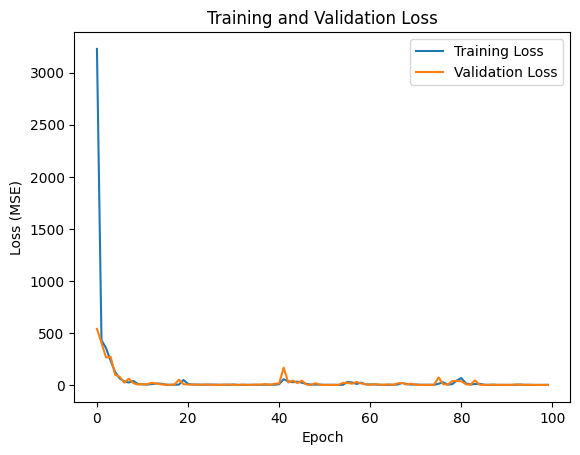

In [5]:
# 6. Make Predictions
y_pred = model.predict(x_test)

# 7. Visualize Results
plt.scatter(x_test, y_test, label='True Function', color='blue', s=10)
plt.plot(x_test, y_pred, label='NN Predictions', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Fit to y = 2x^2 - 10x + 8')
plt.legend()
plt.show()

# 8. Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()